# OOP Demo
Tutorial on how to write and interact with objects in python.

Required packages: `numpy`, `matplotlib`

Evan Komp
***

In functional oriented programming we __use functions to manipulate an input__. This paradigm comes from the desire to have a "set path" as in if we have an input and apply a set of functions, we get a determined output.

In object oriented programming the motivation is somewhat different: here we represent our progress through our workflow as objects because __it is natural for data associated with something to be contained in that thing__. This concept of "ownership" is why some of the shortest packages (least lines of code written in the package) are OOP, and once you are familiar with it, it is also exceptionally human readable!

A conceptual analogy: if we have a function that takes in a set of data and gives its mean and standard deviation, we will always get the same numbers for some dataset. But how in the future are we sure that those two numbers came from the same dataset? In OOP, the mean and standard deviation would be "owned" by the dataset, allowing us to be sure.

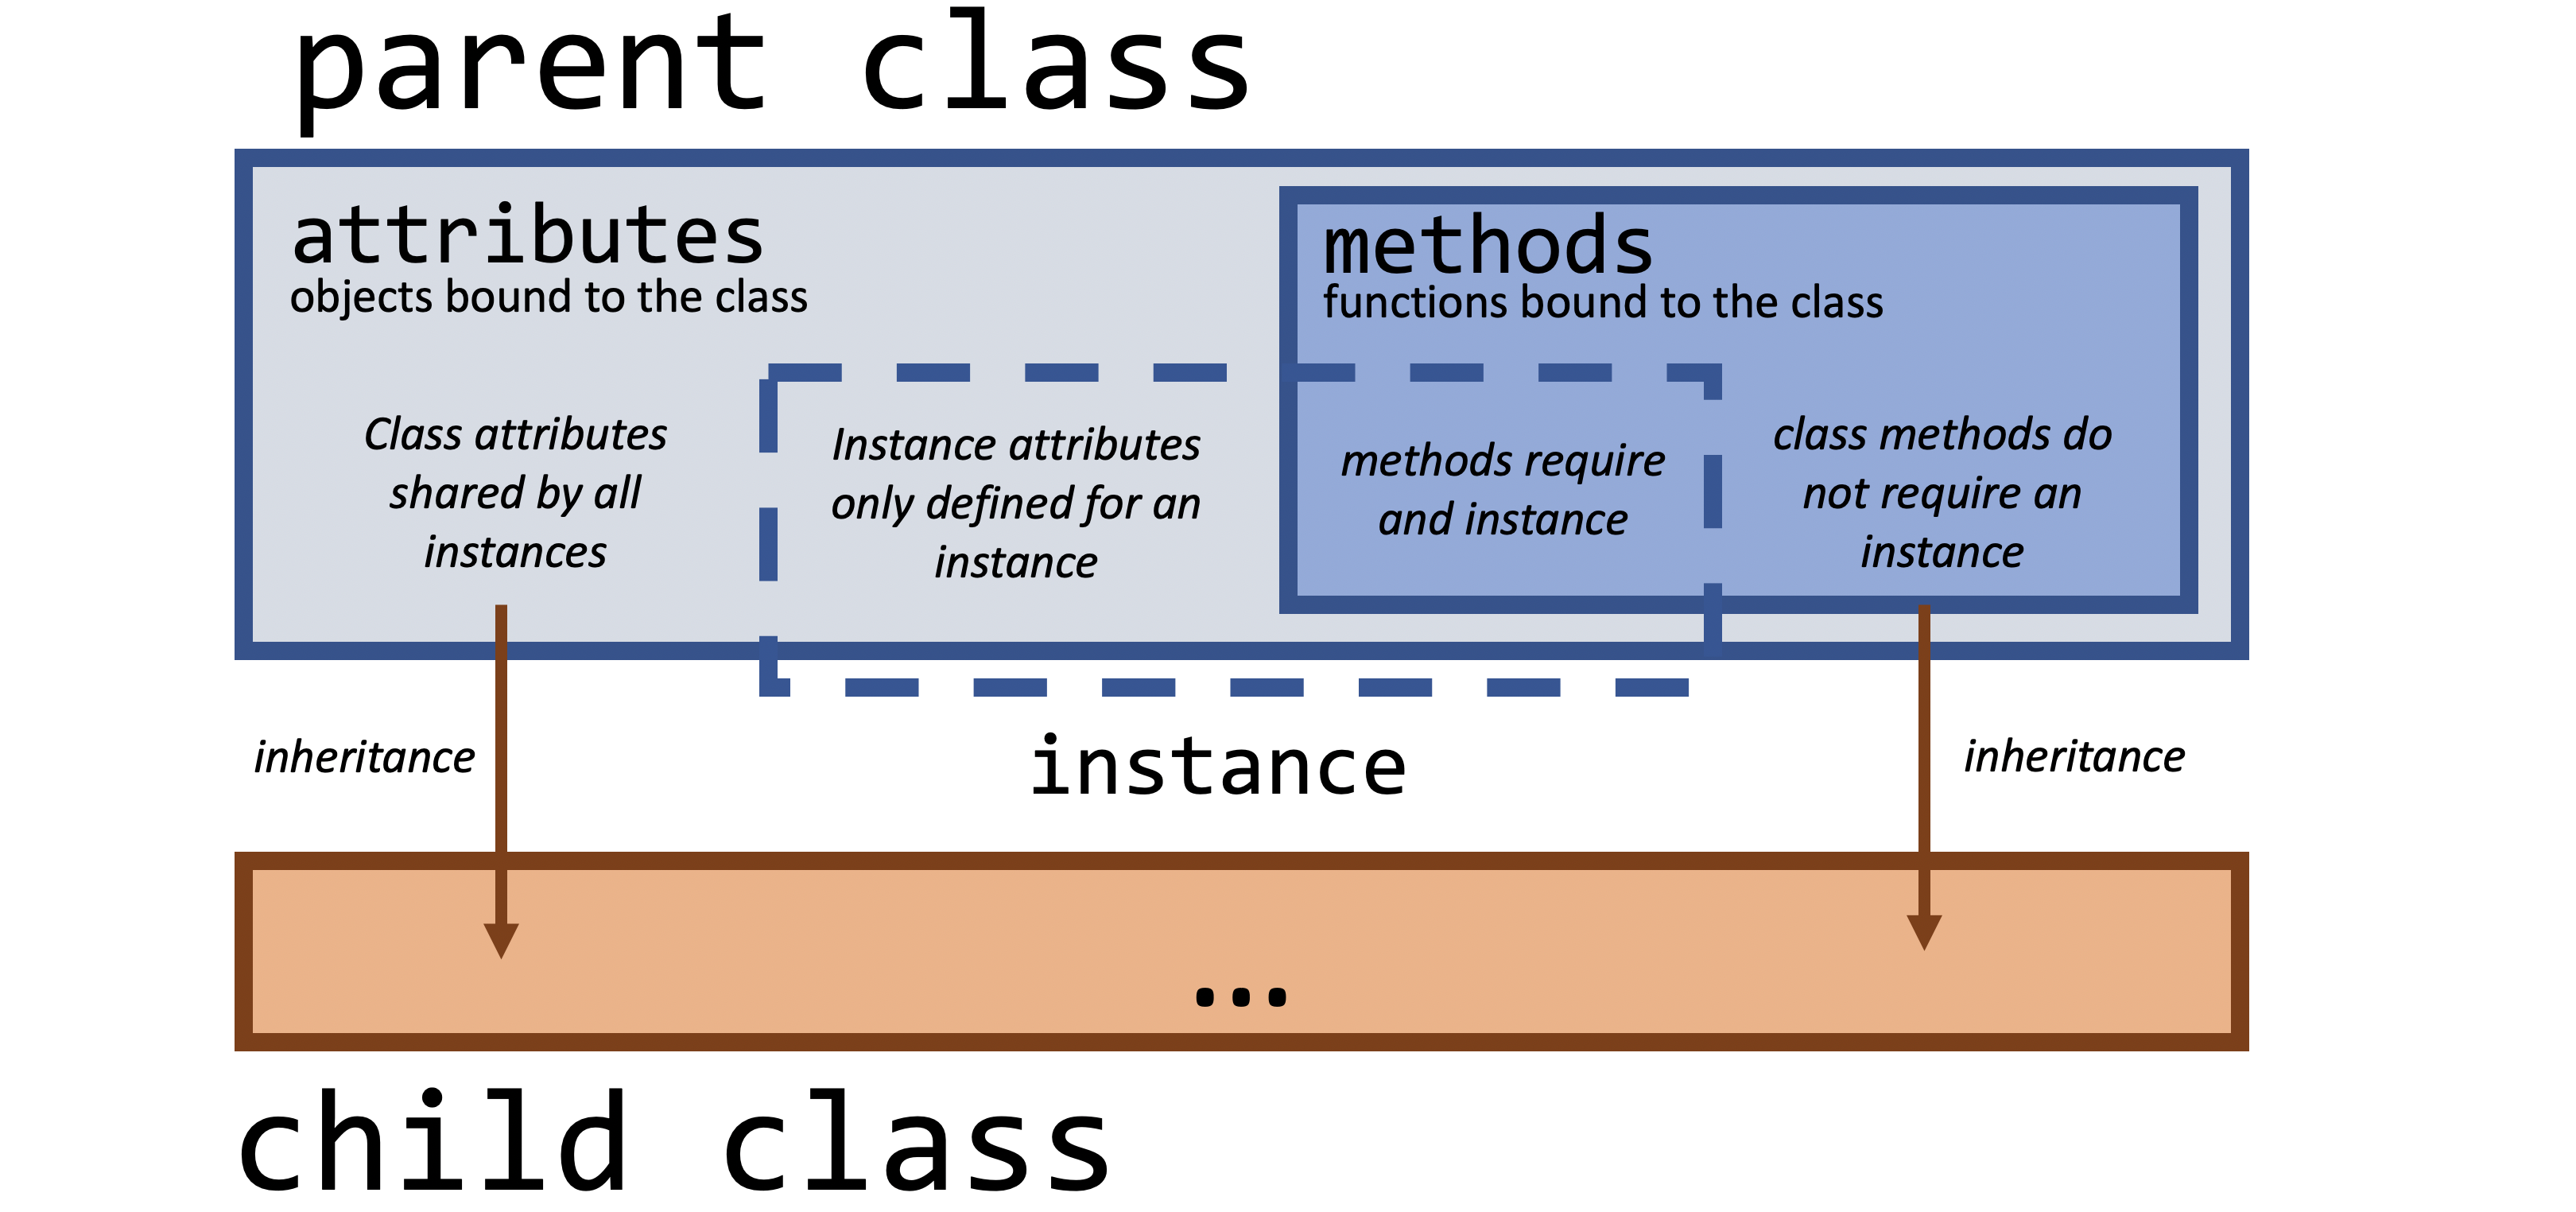

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

***
# 1 - Python Classes

## 1.1 - A basic class with class attributes

Let's say we are interested in representing people for our code. Here we would create a `class` that represents a human. This class __owns__ some things: which we call *class attributes*.

In [ ]:
class Human:
    """A Human being.
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    """
    # class attributes
    # ALL Humans have these
    density = 985.0 #kg/m3
    fears = ['loud noises', 'falling']

In [ ]:
Human.density

## 1.2 - Instances

We've defined a class of objects to represent humans, and defined some things that all humans share. But not all humans are the same! We want to represent people. Each person has some things (above) that all humans share, but also some things unique to them. We call these things *instance attributes*.

In this context, we would call each person an *instance* of the class `Human`. We allow for instances of our class to be created by defining the `__init__` method (more later). `self` refers to the particular instance of the `Human`. 

In [ ]:
class Human:
    """A Human being.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    age : int, age of the person
    """
    # class attributes
    # ALL Humans have these
    density = 985.0 #kg/m3
    fears = ['loud noises', 'falling']
    
    # init method defines creation of an instance
    def __init__(self, height: float, age: int = 0):
        self.height = height
        self.age = age
        return

We can create an instance of a human by calling the class and access its attributes with `.`.

In [ ]:
evan = Human(height=1.78, age=25)

In [ ]:
# class attributes, which all humans have
evan.density

In [ ]:
# instance attributes, which are unique to the instance
evan.age

In [ ]:
# we can easily change them
evan.density = 984.5
evan.density

In [ ]:
Human.density

__Good practice__: Notice how I updated the docstrings to consider instance attributes

## 1.3 - Methods
We can manipulate or use the instance by defining methods. The first argument is always `self` which represents the instance. This is how we access the instance's attributes and manipulate them.

In [ ]:
class Human:
    """A Human being.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    age : int, age of the person
    
    Methods
    -------
    get_older : age the person
    add_fear : gives the person a new fear
    """
    # class attributes
    # ALL Humans have these
    density = 985.0 #kg/m3
    fears = ['loud noises', 'falling']
    
    # init method defines creation of an instance
    def __init__(self, height: float, age: int = 0):
        self.height = height
        self.age = age
        return
    
    def get_older(self):
        """Age the human by one year."""
        self.age += 1
        return
    
    def add_fear(self, new_fear: str):
        """Give the human a new fear.
        
        Parameters
        ----------
        new_fear : str
            New fear to add.
        """
        self.fears.append(new_fear)
        return f"Oh no, I am afraid of {', '.join(self.fears)}!"

In [ ]:
evan = Human(height=1.78, age=25)

In [ ]:
evan.get_older()
print('New age: ', evan.age)

In [ ]:
evan.add_fear('deep water')

Notice how we did not have to pass a variable `self`. Python assumed that the instance to assign to `self` was `evan` since we called `evan.add_fear` eg. we added a fear to the instance `evan`. Watch this!

In [ ]:
Human.add_fear(evan, "functional oriented programming")

## 1.4 - Properties

Sometimes we want attributes to be dynamic. What if an object's status is not something that is "set" but instead __dependant__ on the state of other attributes?

In [ ]:
class Human:
    """A Human being.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    age : int, age of the person
    
    Methods
    -------
    get_older : age the person
    add_fear : gives the person a new fear
    """
    # class attributes
    # ALL Humans have these
    density = 985.0 #kg/m3
    fears = ['loud noises', 'falling']
    
    # init method defines creation of an instance
    def __init__(self, height: float, age: int = 0):
        self.height = height
        self.age = age
        return
    
    def get_older(self):
        """Age the human by one year."""
        self.age += 1
        return
    
    def add_fear(self, new_fear: str):
        """Give the human a new fear.
        
        Parameters
        ----------
        new_fear : str
            New fear to add.
        """
        self.fears.append(new_fear)
        return f"Oh no, I am afraid of {', '.join(self.fears)}!"
    
    @property
    def is_adult(self):
        """bool : whether the person is an adult"""
        return self.age >= 18

In [ ]:
jane = Human(height=1.65, age=17)

In [ ]:
jane.is_adult

In [ ]:
jane.get_older()
jane.is_adult

## 1.5 - Protected attributes
Most of the times we don't want attributes to be assigned as anything the user wishes. Some of the times we don't want that enough to actually prevent them. We can create *protected attributes* to check or prevent things.

In [ ]:
jane.age = "this is a string"

In [ ]:
class Human:
    """A Human being.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    
    Methods
    -------
    get_older : age the person
    add_fear : gives the person a new fear
    """
    # class attributes
    # ALL Humans have these
    density = 985.0 #kg/m3
    fears = ['loud noises', 'falling']
    
    # init method defines creation of an instance
    def __init__(self, height: float, age: int = 0):
        self.height = height
        self.age = age
        return
    
    def get_older(self):
        """Age the human by one year."""
        self.age += 1
        return
    
    def add_fear(self, new_fear: str):
        """Give the human a new fear.
        
        Parameters
        ----------
        new_fear : str
            New fear to add.
        """
        self.fears.append(new_fear)
        return f"Oh no, I am afraid of {', '.join(self.fears)}!"
    
    @property
    def is_adult(self):
        """bool : whether the person is an adult"""
        return self.age >= 18
    
    @property # "hey this method we are defining is actually an attribute"
    def age(self):
        """int : age of the person"""
        return self._age
    
    @age.setter
    def age(self, new_age: int):
        if new_age < 0:
            raise ValueError('Cannot have a human with negative age')
        else:
            self._age = new_age
    

In [ ]:
jane = Human(height=1.65, age=17)
jane.age = -2

In [ ]:
jane = Human(height=1.65, age=-1)

## 1.6 - Class methods (Rated PG 13)
What of we want to operate on a class, and we don't need to know anything about a particular instance? The possible use cases for this may seem narrow, but its more common than you'd expect. The __most common__ class methods are alternate creation methods, that is if you wanted to create an instance algorithmically.

In [ ]:
class Human:
    """A Human being.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    
    Methods
    -------
    get_older : age the person
    add_fear : gives the person a new fear
    """
    # class attributes
    # ALL Humans have these
    density = 985.0 #kg/m3
    fears = ['loud noises', 'falling']
    
    # init method defines creation of an instance
    def __init__(self, height: float, age: int = 0):
        self.height = height
        self.age = age
        return
    
    def get_older(self):
        """Age the human by one year."""
        self.age += 1
        return
    
    def add_fear(self, new_fear: str):
        """Give the human a new fear.
        
        Parameters
        ----------
        new_fear : str
            New fear to add.
        """
        self.fears.append(new_fear)
        return f"Oh no, I am afraid of {', '.join(self.fears)}!"
    
    @property
    def is_adult(self):
        """bool : whether the person is an adult"""
        return self.age >= 18
    
    @property # "hey this method we are defining is actually an attribute"
    def age(self):
        """int : age of the person"""
        return self._age
    
    @age.setter
    def age(self, new_age: int):
        if new_age < 0:
            raise ValueError('Cannot have a human with negative age')
        else:
            self._age = new_age
    
    @classmethod
    def make_baby(cls, mother: Human, father: Human):
        """Create a new Human <3
        
        Parameters
        ----------
        mother : Human
            The mother
        father : Human
            The father
        
        Returns
        -------
        Human : the created baby
        """
        if not father.is_adult or not mother.is_adult:
            raise ValueError('Whoa nelly, something is very wrong')
        
        avg_height = (mother.height + father.height)/2
        scaled_height = (avg_height - 1.35)/3 + 0.42
        baby = cls(height = scaled_height, age = 0)
        optional_fears = mother.fears + father.fears
        if len(optional_fears) > 0:
            baby.add_fear(
                np.random.choice(optional_fears)
            )
        return baby

In [ ]:
jack = Human(height=1.5, age=34)
jill = Human(height=1.85, age=37)
julian = Human.make_baby(jill, jack)

In [ ]:
type(julian)

In [ ]:
julian.height

In [ ]:
julian.age

# 2 Inheritance
<span style="color:red">__Absolutely critical__</span>.

Without Inheritance, OOP is just a clean way of organizing data. With inheritance, we can write extremely flexible code that reuses the same lines of code for many different application. 

## 2.1 A "child" class 
Below we define a subclass of `Human`. In commonly used terminology `Human` is the *parent class* for the *child class* `Student`.

Child classes __inherit__ everything from the parent.

In [ ]:
class Student(Human):
    """A Student.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    
    Methods
    -------
    get_older : age the person
    add_fear : gives the person a new fear
    """
    def pay_tuition(self, in_state=True):
        """Student pays for their tution.
        
        Parameters
        ----------
        in_state : bool
            Whether or not the student has in-state tuition
            
        Returns
        -------
        float : money payed
        """
        if in_state:
            cost = 5000
        else:
            cost = 10000
            self.add_fear('dropping out')
        return cost

In [ ]:
jimmy = Student(height=1.64, age=20)

In [ ]:
jimmy.is_adult

In [ ]:
jimmy.pay_tuition(in_state=False)

In [ ]:
jimmy.fears

The builtin `dir` is like the most useful function ever when writing and working with objects!

In [ ]:
dir(jimmy)

## 2.2 - Modification of parent attributes (`super`!)

What if we want to inherit everything from a parent class, add some new functionaily, but we also need to "change" some things about the parent functionality. We __do not__ have to start from scratch! The builin python function `super` accesses inherited attributes directly!

In [ ]:
class Student(Human):
    """A Student.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    major : str, optional
        major of the student
    
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    
    Methods
    -------
    get_older : age the person
    add_fear : gives the person a new fear
    """
    
    def __init__(self, major: str = 'undeclared', **kwargs):
        self.major = major
        super().__init__(**kwargs)
        return
    
    def pay_tuition(self, in_state=True):
        """Student pays for their tution.
        
        Parameters
        ----------
        in_state : bool
            Whether or not the student has in-state tuition
            
        Returns
        -------
        float : money payed
        """
        if in_state:
            cost = 5000
        else:
            cost = 10000
            self.add_fear('dropping out')
        return cost

In [ ]:
jimmy = Student(major='ChemE')

In [ ]:
jimmy = Student(height=1.65, age=20, major='ChemE')

In [ ]:
jimmy.major

In [ ]:
jimmy.age

__Note__: not explicitly redefing the the positional arguments in the super'ed method is bad practice, but I wanted to show you that the parent method is still executed regardless of how we define this new method.

## 2.3 - Overloading
We can use super to access parent functionality, which is useful if we want to add functionaility to existing attributes. But what if we need to change it entirely? We can *overload* anything about the parent for the child by simply redefining it.

In [ ]:
class Student(Human):
    """A Student.
    
    Parameters
    ----------
    height : float
        height of the person in m
    age : int, default 0
        age of the person in years
    major : str, optional
        major of the student
    
    Attributes
    ----------
    density : float, density of the body
    fears : list of str, things that make the human fearful
    height : float, height of the person
    
    Methods
    -------
    get_older : age the person
    add_fear : gives the person a new fear
    """
    
    def __init__(self, major: str = 'undeclared', grade=14, **kwargs):
        self.major = major
        self.grad = grade
        super().__init__(**kwargs)
        return
    
    def pay_tuition(self, in_state=True):
        """Student pays for their tution.
        
        Parameters
        ----------
        in_state : bool
            Whether or not the student has in-state tuition
            
        Returns
        -------
        float : money payed
        """
        if in_state:
            cost = 5000
        else:
            cost = 10000
            self.add_fear('dropping out')
        return cost
    
    def add_fear(self, new_fear):
        """Give the student a new fear.
        
        Parameters
        ----------
        new_fear : str
            new fear to give the student
        """
        return f'Haha! Through logic and learning I have rationalized {new_fear} and no longer fear it! Nice try!'

In [ ]:
jimmy = Student(height=1.65, age=20, major='ChemE')

In [ ]:
jimmy.add_fear('snakes')

## 2.4 - Abstract Parent structure
In OOP we like to save as much coding as possible for ourselves. Imagine a situation were multiple classes approach a problem in a different way, but ultimately use the results identically. We would define a parent class that is non functioning on its own, but does as much work as can be uniformly done for future applications, and lays out the structure of tose future classes. Consider a numerical line integration method...

In [ ]:
class Integrator:
    """Integrates a 1D function.
    
    Abstract parent class, do not use.
    
    Parameters
    ----------
    func : callable
        function that takes a single positional argument and returns a value
    boundaries : tuble of (float, float)
        Low and high values to compute the integral between
    """
    def __init__(self, func: callable, boundaries: tuple):
        if not callable(func):
            raise ValueError('Must give a callable function to integrate.')
        # flash test shoudl not raise error
        try:
            func(boundaries[0])
            func(boundaries[1])
        except:
            raise ValueError('Function not defined at the edges of the boundary.')
        
        self.func = func
        self.boundaries = boundaries
        self.grid_low = None
        self.grid_size = None
        return
    
    def _discretize(self, grid_size: float):
        """Define grid spacing between boundaries.
        
        Parameters
        ----------
        grid_size : float
            distance between grid points
        """
        self.grid_low = np.arange(*self.boundaries, grid_size)
        self.grid_size = grid_size
        return
    
    def integrate(self, grid_size: float):
        """Integrate the function between the boundaries.
        
        Parameters
        ----------
        grid_size : float
            distance between grid points
            
        Returns
        -------
        float : value of the integral
        """
        self._discretize(grid_size)
        
        areas = [self._compute_area(low, grid_size) for low in self.grid_low]
        return np.sum(areas)
    
    def _compute_area(self, low, grid_size):
        """Computes the numerical area between grid points.
        
        Define for child classes.
        
        Parameters
        ----------
        low : float
            lower value of the grid point
        grid_size : float
            distance between grid points
        """
        raise NotImplementedError('Abstract parent class, do not use directly')
        return

Notice that I set `grid` to `None` in the initializer.

In [ ]:
def f(x):
    return 2*np.sin(x) + x**1.2

In [ ]:
x = np.linspace(0, 10, 200)
y = f(x)
plt.plot(x,y)

In [ ]:
integrator = Integrator(f, (0,10))

In [ ]:
integrator.integrate(grid_size=.01)

All we have to do is define children that fill in the desired methods!

In [ ]:
class MidPointIntegrator(Integrator):
    
    def _compute_area(self, low, grid_size):
        """Computes the numerical area between by the midpoint.
        
        Parameters
        ----------
        low : float
            lower value of the grid point
        grid_size : float
            distance between grid points
        """
        y_mid = self.func(low + grid_size/2)
        area = y_mid * grid_size
        return area
    
class TrapezoidIntegrator(Integrator):
    
    def _compute_area(self, low, grid_size):
        """Computes the numerical area between by the trapezoid rule.
        
        Parameters
        ----------
        low : float
            lower value of the grid point
        grid_size : float
            distance between grid points
        """
        y_low = self.func(low + grid_size/2)
        y_high = self.func(low + grid_size)
        area = grid_size * (y_low + y_high)/2
        return area
     

In [ ]:
mid = MidPointIntegrator(f, (0,10))
print('Midpoint rule: ', mid.integrate(grid_size = .1))
trap = TrapezoidIntegrator(f, (0,10))
print('Trapezoid rule: ', trap.integrate(grid_size = .1))

# 3 - Test it out for yourself!

My solutions further down (don't look!)

1. Create a class `Parallelogram`
  - inputs two side lengths and an angle in degrees and stores them
  - protected attribute `angle` than cannot be less than 180 degrees
  - property `area` that returns the parallelogram area
  
2. Create a class `Rectangle` a child of `Parallelogram`
  - `super` the `__init__` statement so that the angle input is not required
  - create method `scale_side` that takes in an indicator of which side and a fraction to scale that side by, update the side length
  
3. Create a class `Square` a child of `Rectangle`
  - `super` the `__init__` statement so that only the side length is required
  - overload the `scale_side` method, we cannot scale only one side of a square. Bonus if you can raise an AttributeError for it 
  - create a method `scale` that takes in a fraction. `super` to __access the overloaded `scale_side` from the parent__ to scale the square's area by that fraction (hint, scale each side by root fraction)


In [ ]:
class Parallelogram:
    
    def __init__(self, side_lengths: list, angle: float):
        """A parallelagram.
        
        Parameters
        ----------
        side_lengths : list of float
            Two values for the side lengths.
        angle : float
            an angle of the parallelagram in degrees
        """
        self.side_lengths = list(side_lengths)
        self.angle = angle
        return
    
    @property
    def angle(self):
        """An angle in the parallelagram in radians."""
        return self._angle
    
    @angle.setter
    def angle(self, new_angle):
        if new_angle > 180:
            raise ValueError('`angle` should not be more than 2pi')
        else:
            self._angle = new_angle
        return
    
    @property
    def area(self):
        angle_radians = np.radians(self.angle)
        return self.side_lengths[0] * self.side_lengths[1] * np.sin(angle_radians)

In [ ]:
square = Parallelogram((2,2), 90)
square.area

In [ ]:
class Rectangle(Parallelogram):
    def __init__(self, side_lengths: tuple):
        """A Rectangle.
        
        Parameters
        ----------
        side_lengths : tuple of float
            Two values for the side lengths.s
        """
        angle = 90
        super().__init__(side_lengths, angle)
        return
    
    def scale_side(self, side: int, frac: float):
        """Scale a side of the rectangle.
        
        Parameters
        ----------
        side : int, 0 or 1
            which side to shrink
        frac : float
            fraction to scale the side by
        """
        assert side in [0,1], "Side must be 0 or 1"
        assert type(frac) == float, "frac must be a float"
        self.side_lengths[side] *= frac
        return

In [ ]:
rec = Rectangle((2,3))

In [ ]:
rec.area

In [ ]:
rec.scale_side(1, .5)
rec.area

In [ ]:
class Square(Rectangle):

    def __init__(self, side_length: float):
        """A Rectangle.
        
        Parameters
        ----------
        side_length : float
            Length of a side of the sqaure
        """
        super().__init__([side_length, side_length])
        return
    
    @property
    def scale_side(self):
        raise AttributeError('`scale_side` for class `Square`')
        
    def scale(self, frac):
        """Scale square area by a percentage.
        
        Parameters
        ----------
        frac : float
            fraction to scale the side by
        """
        assert type(frac) == float, "frac must be a float"
        side_frac = frac**.5
        super().scale_side( 0, side_frac)
        super().scale_side(1, side_frac)
        return
        

In [ ]:
square = Square(2)
square.area

In [ ]:
square.scale_side

In [ ]:
square.scale(.5)

In [ ]:
square.side_lengths

In [ ]:
square.area